In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('kc_house_data_train.csv')
print(df.shape)
df.head()

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [3]:
# Get column names
column_names = df.columns
print(column_names)
# Get column data types
df.dtypes

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.drop(columns=['Unnamed: 0', 'id','date'], inplace = True)

In [5]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [7]:
df['price'].describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:>

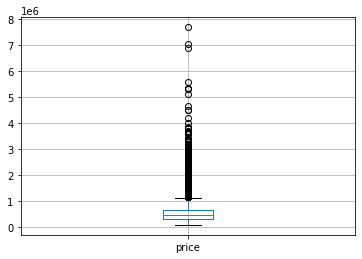

In [8]:
df.boxplot(['price'])

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

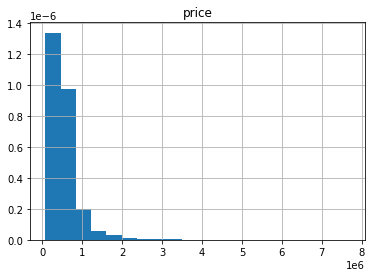

In [9]:
df.hist(column=['price'], bins=20, density =True)

<AxesSubplot:xlabel='waterfront'>

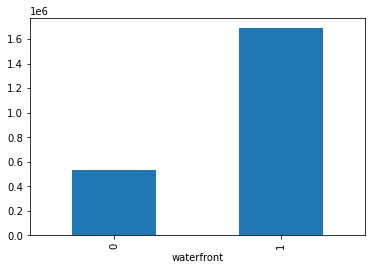

In [10]:
df.groupby('waterfront')['price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='condition'>

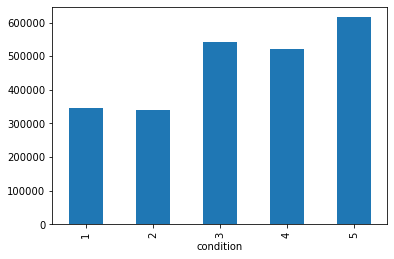

In [11]:
df.groupby('condition')['price'].mean().plot(kind='bar')

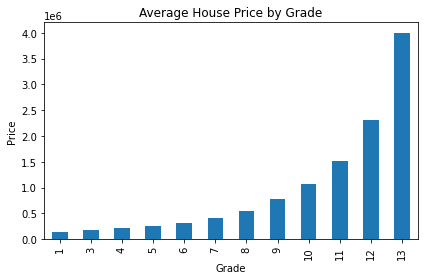

In [12]:
ax= df.groupby('grade')['price'].mean().plot(kind='bar')
ax.set_title('Average House Price by Grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Price')

plt.tight_layout()
plt.savefig('Data_Visualizations/Average_House_Price_by_Grade.png')
plt.show()

<AxesSubplot:xlabel='view'>

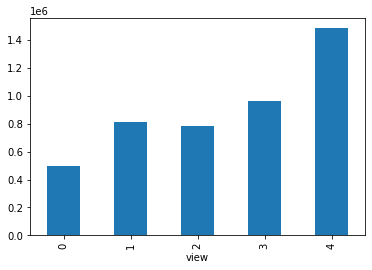

In [13]:
df.groupby('view')['price'].mean().plot(kind='bar')

In [14]:
df['floors'].value_counts()

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

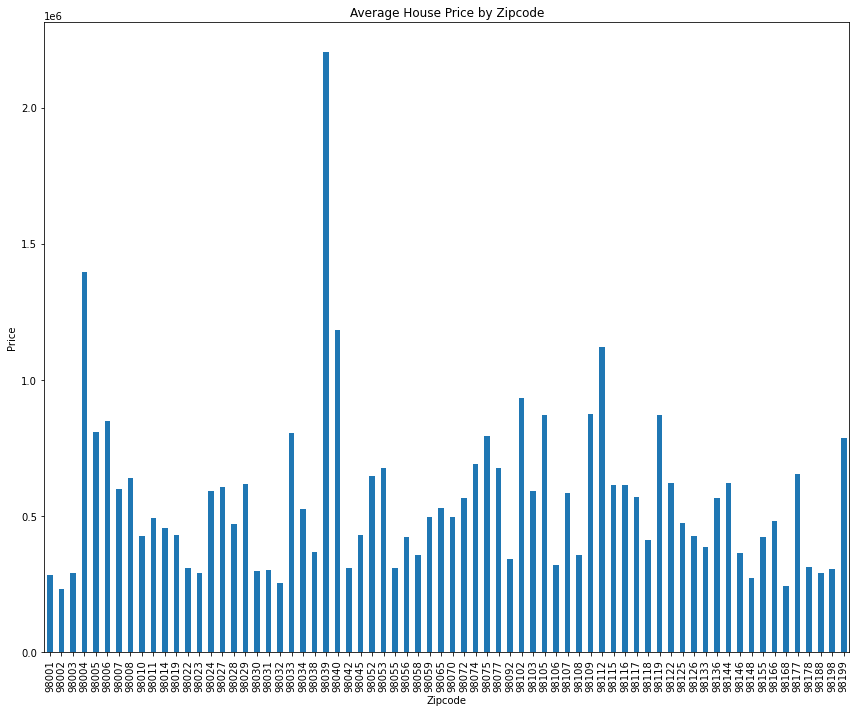

In [15]:
fig, ax = plt.subplots(figsize=(12,10))
ax = df.groupby('zipcode')['price'].mean().plot(kind='bar')
ax.set_title('Average House Price by Zipcode')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price')

plt.tight_layout()
plt.savefig('Data_Visualizations/Average_House_Price_by_Zipcode.png')
plt.show()

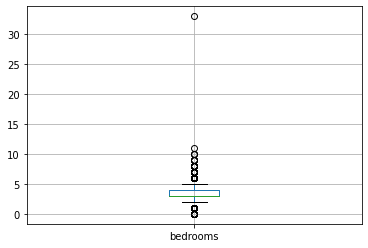

In [16]:
ax = df.boxplot(['bedrooms'])
plt.savefig('Data_Visualizations/bedroom_boxplot.png')

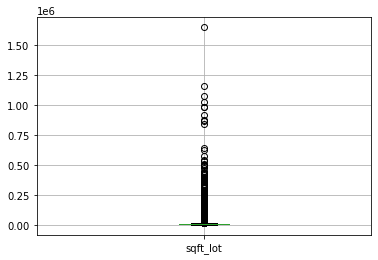

In [17]:
ax = df.boxplot(['sqft_lot'])
plt.savefig('Data_Visualizations/Sqft_Lot_Boxplot.png')

In [18]:
df.groupby('yr_built')['price'].mean()

yr_built
1900    588646.242857
1901    555805.680000
1902    676645.454545
1903    480985.472222
1904    599607.055556
            ...      
2011    537078.900000
2012    525477.531746
2013    673810.053254
2014    691102.339956
2015    760906.034483
Name: price, Length: 116, dtype: float64

In [19]:
#Selecting all houses built in or after 1990.
post90 = df[df['yr_built'] >= 1990]

<AxesSubplot:xlabel='yr_built'>

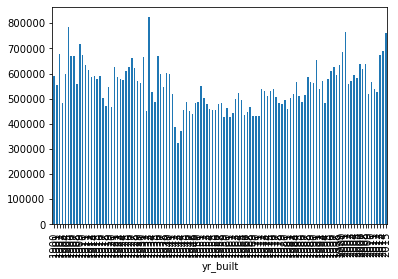

In [20]:
df.groupby('yr_built')['price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='bedrooms'>

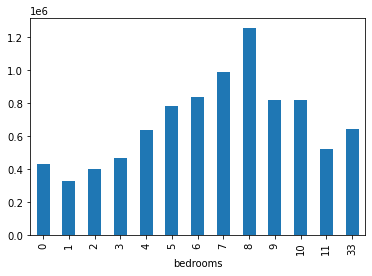

In [21]:
df.groupby('bedrooms')['price'].mean().plot(kind='bar')

In [22]:
df['sqft_range'] = pd.cut(df['sqft_living'], bins=[0, 1000, 2000, 3000, 4000, 5000, np.inf])

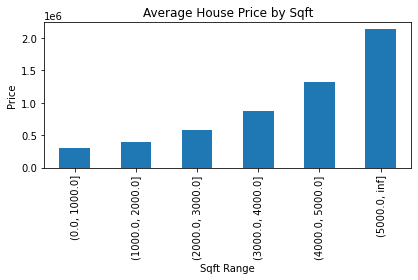

In [23]:
ax = df.groupby('sqft_range')['price'].mean().plot(kind='bar')
ax.set_xlabel('Sqft Range')
ax.set_ylabel('Price')
ax.set_title('Average House Price by Sqft')
plt.tight_layout()
plt.savefig('Data_Visualizations/Average_House_Price_by_Sqft.png')

In [24]:
df.groupby('sqft_range')['price'].mean()

sqft_range
(0.0, 1000.0]       2.960697e+05
(1000.0, 2000.0]    3.992959e+05
(2000.0, 3000.0]    5.764738e+05
(3000.0, 4000.0]    8.782635e+05
(4000.0, 5000.0]    1.327722e+06
(5000.0, inf]       2.134886e+06
Name: price, dtype: float64

In [25]:
df['sqft_percentage'] = df['sqft_living'] / df['sqft_lot']

In [26]:
#Converting yr_built column into datetime.
df['dt_yr_built'] = pd.to_datetime(df['yr_built'].astype(str), format='%Y')

In [27]:
df['decade_built'] = ((df['dt_yr_built'].dt.year//10)*10)

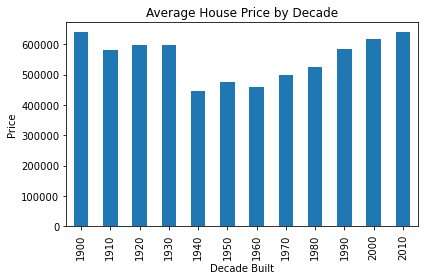

In [28]:
#Comparing the avg price of houses by decade.
ax = df.groupby('decade_built')['price'].mean().plot(kind='bar')
ax.set_xlabel('Decade Built')
ax.set_ylabel('Price')
ax.set_title('Average House Price by Decade')
plt.tight_layout()
plt.savefig('Data_Visualizations/Average_House_Price_by_Decade.png')

In [29]:
df.groupby('decade_built')['price'].mean()

decade_built
1900    640229.312621
1910    580098.425499
1920    597525.566253
1930    597864.548463
1940    447232.918919
1950    474659.752257
1960    459404.440222
1970    499863.001114
1980    524219.988063
1990    584056.096218
2000    617365.948857
2010    640020.592065
Name: price, dtype: float64

In [30]:
word = 'zipcode_'
zipcode_list = df['zipcode'].unique().astype(str).tolist()
[word + x for x in zipcode_list]
len(zipcode_list)

70

In [31]:
df = pd.get_dummies(df, columns = ['zipcode'], drop_first = True)

In [32]:
# Get column names
column_names = df.columns
print(column_names)
len(column_names)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_range', 'sqft_percentage',
       'dt_yr_built', 'decade_built', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipco

91

In [33]:
df.shape

(17290, 91)

In [34]:
df.loc[df.sqft_living >= 7000, "sqft_living"] = 7000

In [36]:
df.loc[df.sqft_lot >= 500000, "sqft_lot"] = 500000

In [39]:
df.loc[df.bathrooms >= 6, "bathrooms"] = 6

In [41]:
df.loc[df.bedrooms >= 10, "bedrooms"] = 10

In [43]:
df.loc[df.sqft_lot15 >= 500000, "sqft_lot15"] = 500000

In [44]:
df.shape

(17290, 91)

In [45]:
model_data = ['yr_built', 'sqft_living', 'sqft_lot', 'sqft_percentage', 'grade', 'condition', 'floors', 
              'bathrooms','bedrooms','sqft_living15', 'sqft_lot15',
            'zipcode_98058','zipcode_98115','zipcode_98006', 'zipcode_98034', 'zipcode_98052', 'zipcode_98031', 'zipcode_98007', 
            'zipcode_98199', 'zipcode_98027', 'zipcode_98119', 'zipcode_98122', 'zipcode_98155','zipcode_98055','zipcode_98118', 'zipcode_98014',
            'zipcode_98059', 'zipcode_98004', 'zipcode_98053', 'zipcode_98072', 'zipcode_98133', 'zipcode_98092','zipcode_98074',
            'zipcode_98125', 'zipcode_98045','zipcode_98106','zipcode_98022', 'zipcode_98177', 'zipcode_98008', 'zipcode_98002',
            'zipcode_98040', 'zipcode_98029', 'zipcode_98042','zipcode_98065','zipcode_98056','zipcode_98144','zipcode_98188',
            'zipcode_98109', 'zipcode_98010', 'zipcode_98075', 'zipcode_98198', 'zipcode_98030', 'zipcode_98105','zipcode_98023',
            'zipcode_98028', 'zipcode_98112', 'zipcode_98038', 'zipcode_98116', 'zipcode_98103', 'zipcode_98178','zipcode_98168','zipcode_98005',
            'zipcode_98077','zipcode_98146','zipcode_98011','zipcode_98126','zipcode_98108', 'zipcode_98136', 'zipcode_98033',
            'zipcode_98003', 'zipcode_98117','zipcode_98107','zipcode_98019','zipcode_98102','zipcode_98032', 'zipcode_98148',
 'zipcode_98166', 'zipcode_98070', 'zipcode_98024','zipcode_98039']
df[model_data].corr()

,yr_built,sqft_living,sqft_lot,sqft_percentage,grade,condition,floors,bathrooms,bedrooms,sqft_living15,sqft_lot15,zipcode_98058,zipcode_98115,zipcode_98006,zipcode_98034,zipcode_98052,zipcode_98031,zipcode_98007,zipcode_98199,zipcode_98027,zipcode_98119,zipcode_98122,zipcode_98155,zipcode_98055,zipcode_98118,zipcode_98014,zipcode_98059,zipcode_98004,zipcode_98053,zipcode_98072,zipcode_98133,zipcode_98092,zipcode_98074,zipcode_98125,zipcode_98045,zipcode_98106,zipcode_98022,zipcode_98177,zipcode_98008,zipcode_98002,zipcode_98040,zipcode_98029,zipcode_98042,zipcode_98065,zipcode_98056,zipcode_98144,zipcode_98188,zipcode_98109,zipcode_98010,zipcode_98075,zipcode_98198,zipcode_98030,zipcode_98105,zipcode_98023,zipcode_98028,zipcode_98112,zipcode_98038,zipcode_98116,zipcode_98103,zipcode_98178,zipcode_98168,zipcode_98005,zipcode_98077,zipcode_98146,zipcode_98011,zipcode_98126,zipcode_98108,zipcode_98136,zipcode_98033,zipcode_98003,zipcode_98117,zipcode_98107,zipcode_98019,zipcode_98102,zipcode_98032,zipcode_98148,zipcode_98166,zipcode_98070,zipcode_98024,zipcode_98039
yr_built,1.000000,0.323908,0.065668,0.280325,0.448003,-0.358921,0.483657,0.509898,0.159526,0.332340,0.077192,0.036751,-0.126756,0.042709,0.029319,0.082900,0.043217,-0.000745,-0.064279,0.077604,-0.084383,-0.084505,-0.045476,-0.003461,-0.114048,0.024882,0.090174,0.004090,0.128415,0.041278,-0.038598,0.085175,0.095351,-0.052353,0.046845,-0.024306,-0.002326,-0.038187,-0.017545,-0.014532,0.001235,0.110811,0.083710,0.104905,0.030898,-0.066082,-0.013108,-0.065926,0.021691,0.101324,-0.019349,0.047990,-0.099297,0.043298,0.027224,-0.101527,0.140347,-0.075538,-0.109130,-0.058986,-0.069587,-0.004000,0.044083,-0.058766,0.035448,-0.079236,-0.040962,-0.052494,0.040556,0.024727,-0.127767,-0.038309,0.066101,-0.052465,-0.014487,-0.016307,-0.048674,-0.003825,0.001273,0.008638
sqft_living,0.323908,1.000000,0.188873,0.083715,0.766292,-0.061811,0.359687,0.754267,0.591169,0.759868,0.178195,-0.006878,-0.046391,0.129227,-0.018715,0.054429,-0.015814,0.000721,0.014110,0.061257,-0.005558,-0.039345,-0.049209,-0.033776,-0.071856,0.002255,0.053797,0.113510,0.079630,0.033980,-0.077789,0.019947,0.090546,-0.045152,-0.006825,-0.081533,-0.030676,0.015443,0.006095,-0.048748,0.126023,0.030090,-0.020987,0.063012,-0.007414,-0.013667,-0.025547,-0.000019,0.006245,0.130258,-0.041974,-0.012832,0.010452,-0.014028,0.006787,0.056444,0.014525,-0.031484,-0.076545,-0.041754,-0.075144,0.059786,0.083560,-0.057994,0.017209,-0.073902,-0.038686,-0.041589,0.049773,-0.017751,-0.075645,-0.059234,0.012743,0.007908,-0.032034,-0.026972,0.001765,-0.014348,0.019182,0.091430
sqft_lot,0.065668,0.188873,1.000000,-0.289315,0.126626,-0.015924,-0.004366,0.096116,0.036294,0.160733,0.766998,0.017597,-0.043946,-0.007354,-0.022012,-0.017304,-0.009191,-0.011163,-0.032987,0.065742,-0.029427,-0.037583,-0.019730,-0.015897,-0.039841,0.151579,-0.002484,-0.004072,0.084848,0.052530,-0.033688,0.071780,-0.002467,-0.027925,0.099915,-0.033038,0.138673,-0.011712,-0.015206,-0.019855,-0.004090,-0.024488,0.014440,0.007481,-0.022683,-0.037519,-0.010667,-0.022559,0.065611,0.013803,-0.014045,-0.006947,-0.027227,-0.018865,-0.008761,-0.030838,0.051121,-0.034771,-0.052838,-0.020842,-0.010979,0.010847,0.109511,-0.020167,-0.009257,-0.035533,-0.025448,-0.027844,-0.018214,-0.013314,-0.046707,-0.036666,0.059904,-0.020949,-0.009486,-0.008108,-0.002811,0.165380,0.154654,0.003181
sqft_percentage,0.280325,0.083715,-0.289315,1.000000,0.189174,-0.153409,0.557179,0.291158,0.033046,-0.039216,-0.289131,-0.055086,0.058393,-0.037543,-0.042139,-0.014515,-0.033402,-0.021562,0.074523,0.044639,0.125551,0.147088,-0.065447,-0.015240,0.023140,-0.069146,-0.014170,-0.029769,-0.033193,-0.062227,0.008290,-0.041425,-0.022791,-0.010100,-0.073463,0.053440,-0.071961,-0.028214,-0.035329,-0.024584,-0.033288,0.077194,-0.045728,0.034338,-0.019608,0.129122,-0.038311,0.102563,-0.051456,-0.007706,-0.047582,-0.027742,0.064082,-0.057053,-0.025728,0.112788,-0.014504,0.071375,0.187242,-0.033579,-0.06896

In [46]:
mlr_model = ols(formula='price~yr_built+sqft_living+sqft_lot+grade+condition+sqft_percentage+bathrooms+bedrooms+zipcode_98058+zipcode_98115+zipcode_98006+zipcode_98034+zipcode_98052+zipcode_98031+zipcode_98007+zipcode_98199+zipcode_98027+zipcode_98119+zipcode_98122+zipcode_98155+zipcode_98055+zipcode_98118+zipcode_98014+zipcode_98059+zipcode_98004+zipcode_98053+zipcode_98072+zipcode_98133+zipcode_98092+zipcode_98074+zipcode_98125+zipcode_98045+zipcode_98106+zipcode_98022+zipcode_98177+zipcode_98008+zipcode_98002+zipcode_98040+zipcode_98029+zipcode_98042+zipcode_98011+zipcode_98065+zipcode_98056+zipcode_98144+zipcode_98188+zipcode_98109+zipcode_98010+zipcode_98075+zipcode_98198+zipcode_98030+zipcode_98105+zipcode_98023+zipcode_98028+zipcode_98112+zipcode_98038+zipcode_98116+zipcode_98103+zipcode_98178+zipcode_98168+zipcode_98005+zipcode_98077+zipcode_98146+zipcode_98011+zipcode_98126+zipcode_98108+zipcode_98136+zipcode_98033+zipcode_98003+zipcode_98117+zipcode_98107+zipcode_98019+zipcode_98102+zipcode_98032+zipcode_98148+zipcode_98166+zipcode_98070+zipcode_98024+zipcode_98039', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     660.8
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:07:31   Log-Likelihood:            -2.3448e+05
No. Observations:               17290   AIC:                         4.691e+05
Df Residuals:                   17212   BIC:                         4.697e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.551e+06   1.65e+05      9.388      0.000    1.23e+06    1.87e+06
yr_built        -1117.9852     84.626    -13.211      0.000   -1283.861    -952.109
sqft_living       196.9466      3.354     58.715      0.000     190.372     203.521
sqft_lot            0.1005      0.047      2.150      0.032       0.009       0.192
grade            8.061e+04   2227.011     36.198      0.000    7.62e+04     8.5e+04
condition        2.039e+04   2446.170      8.335      0.000    1.56e+04    2.52e+04
sqft_percentage -1.128e+05   8226.804    -13.713      0.000   -1.29e+05   -9.67e+04
bathrooms        3.707e+04   3364.997     11.017      0.000    3.05e+04    4.37e+04
bedrooms        -4.077e+04   2057.274    -19.816      0.000   -4.48e+04   -3.67e+04
zipcode_98058    2.483e+04   1.47e+04      1.686      0.092   -4031.820    5.37e+04
zipcode_98115    3.248e+05   1.46e+04     22.195      0.000    2.96e+05    3.53e+05
zipcode_98006    2.576e+05   1.49e+04     17.259      0.000    2.28e+05    2.87e+05
zipcode_98034    2.099e+05   1.44e+04     14.606      0.000    1.82e+05    2.38e+05
zipcode_98052    2.115e+05   1.42e+04     14.906      0.000    1.84e+05    2.39e+05
zipcode_98031    4065.1123    1.7e+04      0.239      0.811   -2.93e+04    3.74e+04
zipcode_98007    2.307e+05   2.04e+04     11.282      0.000    1.91e+05    2.71e+05
zipcode_98199    3.826e+05   1.65e+04     23.140      0.000     3.5e+05    4.15e+05
zipcode_98027      1.6e+05   1.53e+04     10.435      0.000     1.3e+05     1.9e+05
zipcode_98119    5.102e+05      2e+04     25.491      0.000    4.71e+05    5.49e+05
zipcode_98122    3.362e+05   1.75e+04     19.220      0.000    3.02e+05     3.7e+05
zipcode_98155    1.586e+05   1.51e+04     10.516      0.000    1.29e+05    1.88e+05
zipcode_98055    5.048e+04   1.72e+04      2.941      0.003    1.68e+04    8.41e+04
zipcode_98118    1.881e+05   1.49e+04     12.657      0.000    1.59e+05    2.17e+05
zipcode_98014    9.351e+04    2.2e+04      4.244      0.000    5.03e+04    1.37e+05
zipcode_98059    8.335e+04   1.49e+04      5.612      0.000    5.42e+04    1.12e+05
zipcode_98004    7.811e+05   1.68e+04     46.565      0.000    7.48e+05    8.14e+05
zipcode_98053    1.838e+05   1.54e+04     11.918      0.000    1.54e+05    2.14e+05
zipcode_98072    1.245e+05   1.71e+04      7.301      0.000    9.11e+04    1.58e+05
zipcode_98133    1.662e+05   1.47e+04     11.274      0.000    1.37e+05    1.95e+05
zipcode_98092   -4.422e+04   1.58e+04     -2.799      0.005   -7.52e+04   -1.33e+04
zipcode_98074    1.624e+05   1.51e+04     10.761      0.000    1.33e+05    1.92e+05
zipcode_98125    2.126e+05   1.55e+04     13.748      0.000    1.82e+05    2.43e+05
zipcode_98045    8.721e+04   1.81e+04      4.811      0.000    5.17e+04    1.23e+05
zipcode_98106    1.584e+05   1.63e+04      9.736      0.000

In [47]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_range,sqft_percentage,dt_yr_built,decade_built,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,"(2000.0, 3000.0]",0.232767,1986-01-01,1980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,"(2000.0, 3000.0]",0.430906,1977-01-01,1970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,"(3000.0, 4000.0]",0.346094,1997-01-01,1990,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,"(4000.0, 5000.0]",0.312158,1990-01-01,1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,"(2000.0, 3000.0]",0.474330,2004-01-01,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# fit a model
#import the class
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm.fit(df[model_data], df['price'])

LinearRegression()

In [49]:
print(lm.intercept_)
print(lm.coef_)

1550069.1088693272
[-1.12179409e+03  1.84895763e+02  2.04519682e-01 -1.09727919e+05
  7.44367564e+04  2.19474168e+04  5.44937933e+03  3.71743659e+04
 -4.00556477e+04  3.33067231e+01 -1.80959358e-01  2.31123304e+04
  3.27447230e+05  2.45292027e+05  2.09183698e+05  2.04430583e+05
  1.56622719e+03  2.27676776e+05  3.83009634e+05  1.53639887e+05
  5.09885671e+05  3.37543507e+05  1.60944968e+05  4.90188983e+04
  1.90131069e+05  9.65903926e+04  7.43224595e+04  7.71653306e+05
  1.76441907e+05  1.17316770e+05  1.69974706e+05 -4.72879253e+04
  1.52712164e+05  2.15372488e+05  8.95353689e+04  1.65585491e+05
  2.04585336e+04  2.37960793e+05  2.79050686e+05  4.66634666e+04
  5.11106256e+05  1.91815402e+05  8.09424521e+03  8.92297921e+04
  1.06534723e+05  3.13442858e+05  4.43764922e+04  5.02632946e+05
  5.48184474e+04  1.63285398e+05  5.80708235e+04 -4.28468802e+03
  4.68530796e+05 -3.62315230e+04  1.12819054e+05  6.03119598e+05
  2.23134687e+04  3.12019693e+05  3.52282491e+05  8.58905492e+04
  7.85

In [50]:
y_pred = lm.predict(df[model_data])

Text(0, 0.5, 'Predictions')

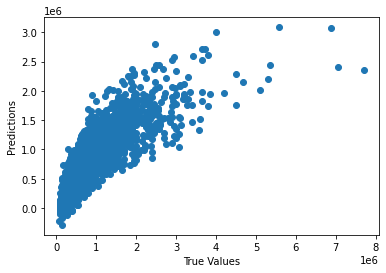

In [51]:
y_pred[:100]
## The line / model
plt.scatter( df['price'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
mae = mean_absolute_error(df['price'], y_pred)
mse = mean_squared_error(df['price'], y_pred)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

105171.94648320302
187222.5604780606


**Plotting the Residuals**

<AxesSubplot:ylabel='price'>

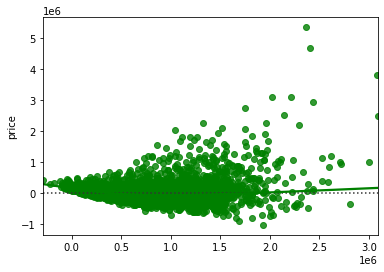

In [54]:
sns.residplot(x=y_pred, y=df['price'], lowess=True, color="g")

**Plotting the Distribution of the Residuals**

In [55]:
residuals =  df['price']- y_pred

/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


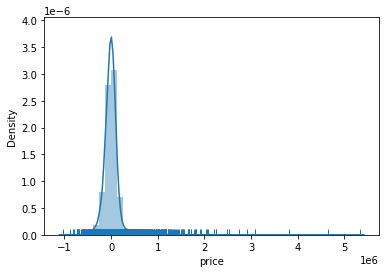

In [56]:
sns.distplot(residuals, kde=True, rug=True);

In [57]:
from scipy import stats


In [58]:
print (stats.shapiro(residuals))

ShapiroResult(statistic=0.6807948350906372, pvalue=0.0)


/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**QQ-Plot To Determine if the Data is Normally Distributed.**

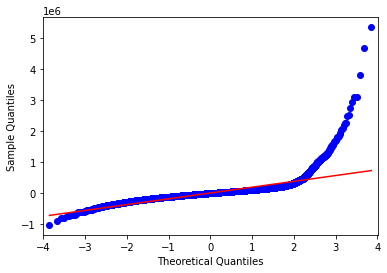

In [59]:
import statsmodels.api as sm 

fig = sm.qqplot(residuals,line='s')
plt.show()

**Using a non-linear tansformation, taking the log of the target variable, to create a linear relationship**

In [60]:
df['log_price'] = np.log(df['price'])

array([[<AxesSubplot:title={'center':'log_price'}>]], dtype=object)

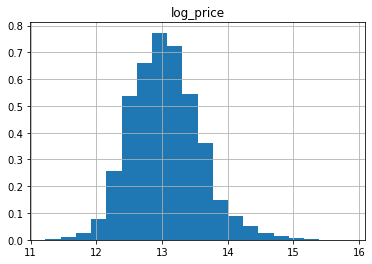

In [61]:
df.hist(column=['log_price'], bins=20, density =True)

In [62]:
mlr_model = ols(formula='log_price~yr_built+sqft_living+sqft_lot+grade+condition+sqft_percentage+bathrooms+bedrooms+zipcode_98058+zipcode_98115+zipcode_98006+zipcode_98034+zipcode_98052+zipcode_98031+zipcode_98007+zipcode_98199+zipcode_98027+zipcode_98119+zipcode_98122+zipcode_98155+zipcode_98055+zipcode_98118+zipcode_98014+zipcode_98059+zipcode_98004+zipcode_98053+zipcode_98072+zipcode_98133+zipcode_98092+zipcode_98074+zipcode_98125+zipcode_98045+zipcode_98106+zipcode_98022+zipcode_98177+zipcode_98008+zipcode_98002+zipcode_98040+zipcode_98029+zipcode_98042+zipcode_98011+zipcode_98065+zipcode_98056+zipcode_98144+zipcode_98188+zipcode_98109+zipcode_98010+zipcode_98075+zipcode_98198+zipcode_98030+zipcode_98105+zipcode_98023+zipcode_98028+zipcode_98112+zipcode_98038+zipcode_98116+zipcode_98103+zipcode_98178+zipcode_98168+zipcode_98005+zipcode_98077+zipcode_98146+zipcode_98011+zipcode_98126+zipcode_98108+zipcode_98136+zipcode_98033+zipcode_98003+zipcode_98117+zipcode_98107+zipcode_98019+zipcode_98102+zipcode_98032+zipcode_98148+zipcode_98166+zipcode_98070+zipcode_98024+zipcode_98039', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1346.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:07:43   Log-Likelihood:                 3398.3
No. Observations:               17290   AIC:                            -6641.
Df Residuals:                   17212   BIC:                            -6035.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.3082      0.175     70.345      0.000      11.965      12.651
yr_built           -0.0007   8.96e-05     -7.495      0.000      -0.001      -0.000
sqft_living         0.0002   3.55e-06     63.533      0.000       0.000       0.000
sqft_lot         6.434e-07   4.95e-08     12.988      0.000    5.46e-07     7.4e-07
grade               0.1214      0.002     51.469      0.000       0.117       0.126
condition           0.0485      0.003     18.714      0.000       0.043       0.054
sqft_percentage    -0.1342      0.009    -15.401      0.000      -0.151      -0.117
bathrooms           0.0517      0.004     14.501      0.000       0.045       0.059
bedrooms           -0.0126      0.002     -5.784      0.000      -0.017      -0.008
zipcode_98058       0.1557      0.016      9.984      0.000       0.125       0.186
zipcode_98115       0.7910      0.015     51.037      0.000       0.761       0.821
zipcode_98006       0.6307      0.016     39.895      0.000       0.600       0.662
zipcode_98034       0.5344      0.015     35.100      0.000       0.505       0.564
zipcode_98052       0.6266      0.015     41.704      0.000       0.597       0.656
zipcode_98031       0.0629      0.018      3.487      0.000       0.028       0.098
zipcode_98007       0.6321      0.022     29.192      0.000       0.590       0.675
zipcode_98199       0.8477      0.018     48.400      0.000       0.813       0.882
zipcode_98027       0.5043      0.016     31.054      0.000       0.473       0.536
zipcode_98119       0.9987      0.021     47.113      0.000       0.957       1.040
zipcode_98122       0.7932      0.019     42.813      0.000       0.757       0.830
zipcode_98155       0.4137      0.016     25.897      0.000       0.382       0.445
zipcode_98055       0.1401      0.018      7.709      0.000       0.105       0.176
zipcode_98118       0.4501      0.016     28.588      0.000       0.419       0.481
zipcode_98014       0.2745      0.023     11.760      0.000       0.229       0.320
zipcode_98059       0.3409      0.016     21.670      0.000       0.310       0.372
zipcode_98004       1.0908      0.018     61.389      0.000       1.056       1.126
zipcode_98053       0.5788      0.016     35.431      0.000       0.547       0.611
zipcode_98072       0.4719      0.018     26.120      0.000       0.436       0.507
zipcode_98133       0.4322      0.016     27.683      0.000       0.402       0.463
zipcode_98092       0.0285      0.017      1.704      0.088      -0.004       0.061
zipcode_98074       0.5534      0.016     34.618      0.000       0.522       0.585
zipcode_98125       0.5556      0.016     33.922      0.000       0.524       0.588
zipcode_98045       0.3082      0.019     16.054      0.000       0.271       0.346
zipcode_98106       0.3073      0.017     17.833      0.000

In [63]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log.fit(df[model_data], df['log_price'])

LinearRegression()

In [64]:
print(lm_log.intercept_)
print(lm_log.coef_)

12.350070594714312
[-7.06665650e-04  1.90074892e-04  7.35118413e-07 -1.23363388e-01
  1.03529152e-01  5.29294014e-02  1.78621183e-02  5.20062527e-02
 -1.02832394e-02  9.60967955e-05 -1.13381184e-07  1.50372376e-01
  7.97901354e-01  5.94987217e-01  5.32299792e-01  6.05930889e-01
  5.59438246e-02  6.23068937e-01  8.48287508e-01  4.81750639e-01
  9.96114833e-01  7.95397464e-01  4.19784173e-01  1.35826235e-01
  4.55180788e-01  2.72712061e-01  3.14060007e-01  1.06281996e+00
  5.54842431e-01  4.49717013e-01  4.42465510e-01  1.52716954e-02
  5.24497946e-01  5.62917046e-01  3.12968412e-01  3.27430193e-01
  6.10290035e-02  6.08389142e-01  6.71214817e-01 -2.66854157e-02
  8.41427104e-01  5.77427097e-01  5.25027395e-02  3.90797319e-01
  3.13712445e-01  6.78513949e-01  8.88014915e-02  9.72073001e-01
  2.13695951e-01  5.31786371e-01  1.06089897e-01  3.51013064e-02
  9.23557608e-01 -3.84425066e-02  4.07532178e-01  9.97862301e-01
  1.52152813e-01  7.71246408e-01  8.21050913e-01  1.72231769e-01
  5.18

In [65]:
y_log_pred = lm_log.predict(df[model_data])
y_log_pred_exp = np.exp(y_log_pred)

In [66]:
mae = mean_absolute_error(df['price'], y_log_pred_exp)
mse = mean_squared_error(df['price'], y_log_pred_exp)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

81322.44512818241
156770.20428099454


**Plotting the Residuals**

/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='log_price'>

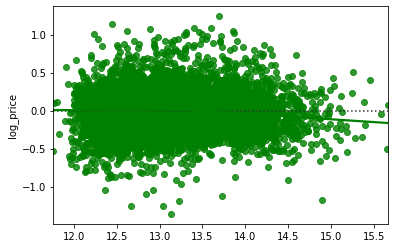

In [67]:
sns.residplot(y_log_pred, df['log_price'], lowess=True, color="g")

**Plotting the Distribution of the Residuals**

In [68]:
log_residuals =  df['log_price']- y_log_pred

/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


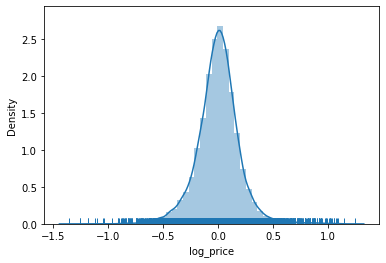

In [69]:
sns.distplot(log_residuals, kde=True, rug=True);

In [70]:
print (stats.shapiro(log_residuals))


ShapiroResult(statistic=0.9621265530586243, pvalue=0.0)


/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**QQ-Plot To Determine if the Data is Normally Distributed.**

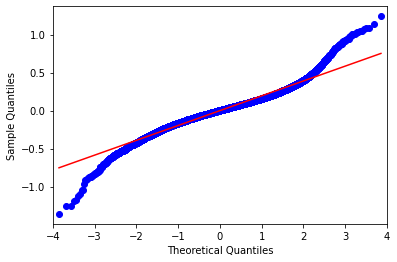

In [71]:
fig = sm.qqplot(log_residuals,line='s')
plt.show()

In [72]:
# #break the colums in to groups to plot 4 on a row at a time
# n = 4
# row_groups= [model_data[i:i+n] for i in range(0, len(model_data), n) ]

In [73]:
# for i in row_groups:
#     pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)

In [74]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_range', 'sqft_percentage',
       'dt_yr_built', 'decade_built', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipco

**Train Test Split**

In [75]:
features = ['yr_built', 'sqft_living', 'sqft_lot', 'sqft_percentage', 'grade', 'condition', 'floors', 
              'bathrooms','bedrooms','sqft_living15', 'sqft_lot15',
            'zipcode_98058','zipcode_98115','zipcode_98006', 'zipcode_98034', 'zipcode_98052', 'zipcode_98031', 'zipcode_98007', 
            'zipcode_98199', 'zipcode_98027', 'zipcode_98119', 'zipcode_98122', 'zipcode_98155','zipcode_98055','zipcode_98118', 'zipcode_98014',
            'zipcode_98059', 'zipcode_98004', 'zipcode_98053', 'zipcode_98072', 'zipcode_98133', 'zipcode_98092','zipcode_98074',
            'zipcode_98125', 'zipcode_98045','zipcode_98106','zipcode_98022', 'zipcode_98177', 'zipcode_98008', 'zipcode_98002',
            'zipcode_98040', 'zipcode_98029', 'zipcode_98042','zipcode_98065','zipcode_98056','zipcode_98144','zipcode_98188',
            'zipcode_98109', 'zipcode_98010', 'zipcode_98075', 'zipcode_98198', 'zipcode_98030', 'zipcode_98105','zipcode_98023',
            'zipcode_98028', 'zipcode_98112', 'zipcode_98038', 'zipcode_98116', 'zipcode_98103', 'zipcode_98178','zipcode_98168','zipcode_98005',
            'zipcode_98077','zipcode_98146','zipcode_98011','zipcode_98126','zipcode_98108', 'zipcode_98136', 'zipcode_98033',
            'zipcode_98003', 'zipcode_98117','zipcode_98107','zipcode_98019','zipcode_98102','zipcode_98032', 'zipcode_98148',
 'zipcode_98166', 'zipcode_98070', 'zipcode_98024','zipcode_98039']

In [76]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['price'], random_state=15,test_size=0.2)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


In [80]:
#your code here 
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)


In [81]:
from sklearn import metrics

In [82]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 191691.76388926478
Testing Root Mean Squared Error: 169545.4670640013


**Filtering The Features Using Recursive Feature Elimination**

In [83]:
from sklearn.feature_selection import RFECV

In [84]:
ols = LinearRegression()

In [85]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [86]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [89]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm.fit(X_train, y_train)


In [90]:
#your code here 
y_train_pred_rfe = lm_rfe.predict(X_train[selected_rfe])

y_test_pred_rfe = lm_rfe.predict(X_test[selected_rfe])


In [92]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rfe))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfe))

print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 191691.76388926478
Testing Root Mean Squared Error: 169545.4670640013


In [93]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(df[selected_rfe], df['price'])

In [94]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()


In [95]:
other_info = [selected_rfe]

In [96]:
pickle_out = open('other_info.pickle', "wb")
pickle.dump(other_info, pickle_out)
pickle_out.close()